### Machine Learning Lab 3

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Linearly Seperable synthetic 2D dataset

In [3]:
np.random.seed(0)
num_samples=100

class1_x = np.random.uniform(0, 5, num_samples)
class1_y = np.random.uniform(0, 2*class1_x + 1, num_samples)

class2_x = np.random.uniform(5, 10, num_samples)
class2_y = np.random.uniform(2*class2_x + 1, 15, num_samples)

[]

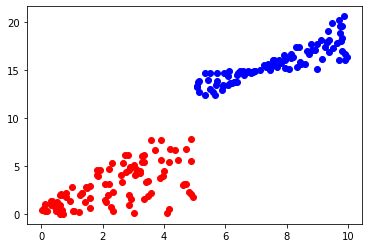

In [4]:
plt.scatter(class1_x, class1_y, c="red")
plt.scatter(class2_x, class2_y, c="blue")
plt.plot()

### Non Linearly Seperable synthetic 2D dataset

In [5]:
np.random.seed(0)
num_samples=100
theta=np.linspace(0, 2*np.pi, num_samples)
radius = 2 + np.random.randn(num_samples) * 1
class1_x = radius * np.cos(theta) + np.random.randn(num_samples)
class1_y = radius * np.sin(theta) + np.random.randn(num_samples)

theta = np.linspace(0, 2*np.pi, num_samples)
radius = 7 + np.random.randn(num_samples) * 1.5
class2_x = radius * np.cos(theta) + np.random.randn(num_samples)
class2_y = radius * np.sin(theta) + np.random.randn(num_samples)

[]

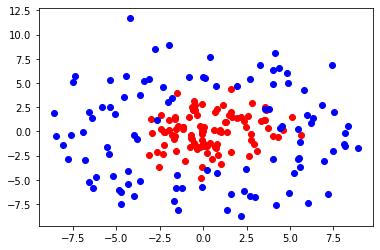

In [6]:
plt.scatter(class1_x, class1_y, c="red")
plt.scatter(class2_x, class2_y, c="blue")
plt.plot()

### Sigmoid

In [7]:
num_samples=100
class1_x = np.random.uniform(0, 5, num_samples)
class1_y = np.random.uniform(0, 1/(np.e**-(2*class1_x+7) + 1), num_samples)

class2_x = np.random.uniform(5, 10, num_samples)
class2_y = np.random.uniform(0, 1/(np.e**-(class2_x+4) + 1), num_samples)

[]

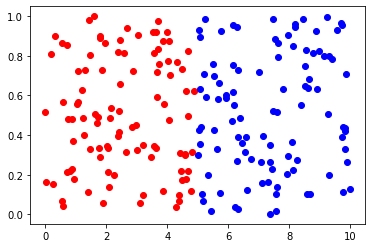

In [8]:
plt.scatter(class1_x, class1_y, c="red")
plt.scatter(class2_x, class2_y, c="blue")
plt.plot()

### Implementation of Logistic Regression

In [26]:
class LogisticRegression_:
    def __init__(self, eta:int, iter:int, weights:int|None, bias:int):
        self.eta=eta
        self.iter=iter
        self.bias=bias
        self.weights=weights

    def sigmoid(self, z: np.array)->np.array:
        return 1/(1+np.e**-z)
    
    def fit(self, x: np.array, y: np.array)->None:
        n_sample, n_feat=x.shape
        self.weights=np.zeros(n_feat)

        for _ in range(self.iter):
            z=np.dot(x, self.weights)+self.bias
            y_pred=self.sigmoid(z)

            dw=(1/n_sample)*np.dot(x.T, y_pred-y)
            db=(1/n_feat)*np.sum(y_pred-y)

            self.weights-=self.eta*dw
            self.bias-=self.eta*db

    def predict(self, x: np.array)-> np.array:
        z=np.dot(x, self.weights)+self.bias
        y_pred=self.sigmoid(z)
        return np.array([1 if p > 0.5 else 0 for p in y_pred])


In [27]:
x=np.arange(8)
y=np.array([0, 0, 0, 0, 1, 1, 1, 1])

reg0=LogisticRegression_(eta=0.02, iter=1000, weights=None, bias=0)
x=x.reshape((len(x), 1))
reg0.fit(x, y)
print("Predictions: ", reg0.predict(x))

Predictions:  [0 0 0 0 1 1 1 1]


### Using sklearn

In [22]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x, y)

LogisticRegression()

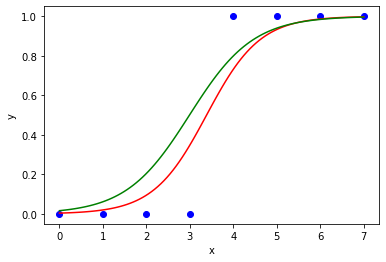

In [28]:
plt.scatter(x, y, color="blue")
plt.xlabel('x')
plt.ylabel('y')
px = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
py=np.dot(px, reg0.weights)+reg0.bias
plt.plot(px, reg0.sigmoid(py), color="red")

py=np.dot(px, reg.coef_)
plt.plot(px, reg.predict_proba(py)[:, 1], color="green")
plt.show()